In [2]:
# ---------------------------------------------
# PURPOSE: Train MLP model on Mediapipe keypoints for sign recognition
# ---------------------------------------------

import os
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# Define actions used during data collection
actions = [
    'hello', 'iloveyou', 'please', 'thankyou', 'ok',
    'excuseme', 'sorry', 'welcome', 'stop', 'goodbye'
]
label_map = {label: num for num, label in enumerate(actions)}

# STEP 1: Load Keypoints Data
DATA_PATH = os.path.join('MP_Data')
sequence_length = 30
sequences, labels = [], []

for action in actions:
    for sequence in os.listdir(os.path.join(DATA_PATH, action)):
        window = []
        for frame_num in range(sequence_length):
            res_path = os.path.join(DATA_PATH, action, sequence, f"{frame_num}.npy")
            if os.path.exists(res_path):
                res = np.load(res_path)
                window.append(res)
        if len(window) == sequence_length:
            sequences.append(window)
            labels.append(label_map[action])

X = np.array(sequences)
y = to_categorical(labels).astype(int)

# STEP 2: Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# STEP 3: Build MLP Model
model = Sequential()
model.add(Flatten(input_shape=(X.shape[1], X.shape[2])))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(len(actions), activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# STEP 4: Train
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_test, y_test))

# STEP 5: Evaluate
y_pred = np.argmax(model.predict(X_test), axis=1)
y_true = np.argmax(y_test, axis=1)
print("\nConfusion Matrix:\n", confusion_matrix(y_true, y_pred))
print("\nClassification Report:\n", classification_report(y_true, y_pred))

Epoch 1/30
16/16 [==============================] - 4s 193ms/step - loss: 11.3559 - accuracy: 0.0978 - val_loss: 2.4099 - val_accuracy: 0.2520
Epoch 2/30
16/16 [==============================] - 2s 152ms/step - loss: 2.3942 - accuracy: 0.1405 - val_loss: 2.1858 - val_accuracy: 0.1545
Epoch 3/30
16/16 [==============================] - 2s 142ms/step - loss: 2.2419 - accuracy: 0.1324 - val_loss: 2.1600 - val_accuracy: 0.1707
Epoch 4/30
16/16 [==============================] - 2s 139ms/step - loss: 2.2530 - accuracy: 0.1405 - val_loss: 2.2706 - val_accuracy: 0.1301
Epoch 5/30
16/16 [==============================] - 2s 141ms/step - loss: 2.2442 - accuracy: 0.1324 - val_loss: 2.2509 - val_accuracy: 0.1463
Epoch 6/30
16/16 [==============================] - 2s 142ms/step - loss: 2.2227 - accuracy: 0.1568 - val_loss: 2.2124 - val_accuracy: 0.1545
Epoch 7/30
16/16 [==============================] - 2s 143ms/step - loss: 2.1948 - accuracy: 0.1527 - val_loss: 2.1383 - val_accuracy: 0.1382
Epoch

C:\Users\saite\anaconda3\envs\signlang\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\saite\anaconda3\envs\signlang\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\saite\anaconda3\envs\signlang\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result)

In [10]:
# ---------------------------------------------
# PURPOSE: Train LSTM model on Mediapipe keypoints for sign recognition
# ---------------------------------------------

import os
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# Define actions used during data collection
actions = [
    'hello', 'iloveyou', 'please', 'thankyou', 'ok',
    'excuseme', 'sorry', 'welcome', 'stop', 'goodbye'
]
label_map = {label: num for num, label in enumerate(actions)}

# STEP 1: Load Keypoints Data
DATA_PATH = os.path.join('MP_Data')
sequence_length = 30
sequences, labels = [], []

for action in actions:
    for sequence in os.listdir(os.path.join(DATA_PATH, action)):
        window = []
        for frame_num in range(sequence_length):
            res_path = os.path.join(DATA_PATH, action, sequence, f"{frame_num}.npy")
            if os.path.exists(res_path):
                res = np.load(res_path)
                window.append(res)
        if len(window) == sequence_length:
            sequences.append(window)
            labels.append(label_map[action])

X = np.array(sequences)
y = to_categorical(labels).astype(int)

# STEP 2: Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# STEP 3: Build LSTM Model
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(X.shape[1], X.shape[2])))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(len(actions), activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# STEP 4: Train
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_test, y_test))

# STEP 5: Evaluate
y_pred = np.argmax(model.predict(X_test), axis=1)
y_true = np.argmax(y_test, axis=1)
print("\nConfusion Matrix:\n", confusion_matrix(y_true, y_pred))
print("\nClassification Report:\n", classification_report(y_true, y_pred))

Epoch 1/30
16/16 [==============================] - 7s 136ms/step - loss: 9.8188 - accuracy: 0.0896 - val_loss: 6.2398 - val_accuracy: 0.0894
Epoch 2/30
16/16 [==============================] - 2s 138ms/step - loss: 6.4541 - accuracy: 0.1141 - val_loss: 2.5028 - val_accuracy: 0.1057
Epoch 3/30
16/16 [==============================] - 2s 132ms/step - loss: 2.7382 - accuracy: 0.1039 - val_loss: 2.3627 - val_accuracy: 0.0650
Epoch 4/30
16/16 [==============================] - 2s 138ms/step - loss: 2.4443 - accuracy: 0.1100 - val_loss: 2.2732 - val_accuracy: 0.2033
Epoch 5/30
16/16 [==============================] - 2s 132ms/step - loss: 2.2981 - accuracy: 0.1405 - val_loss: 2.2689 - val_accuracy: 0.1220
Epoch 6/30
16/16 [==============================] - 2s 135ms/step - loss: 2.2660 - accuracy: 0.1589 - val_loss: 2.2249 - val_accuracy: 0.1463
Epoch 7/30
16/16 [==============================] - 2s 136ms/step - loss: 2.2481 - accuracy: 0.1507 - val_loss: 2.2051 - val_accuracy: 0.1870
Epoch 

In [11]:
# ---------------------------------------------
# PURPOSE: Train GRU model on Mediapipe keypoints for sign recognition
# ---------------------------------------------

import os
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# Define actions used during data collection
actions = [
    'hello', 'iloveyou', 'please', 'thankyou', 'ok',
    'excuseme', 'sorry', 'welcome', 'stop', 'goodbye'
]
label_map = {label: num for num, label in enumerate(actions)}

# STEP 1: Load Keypoints Data
DATA_PATH = os.path.join('MP_Data')
sequence_length = 30
sequences, labels = [], []

for action in actions:
    for sequence in os.listdir(os.path.join(DATA_PATH, action)):
        window = []
        for frame_num in range(sequence_length):
            res_path = os.path.join(DATA_PATH, action, sequence, f"{frame_num}.npy")
            if os.path.exists(res_path):
                res = np.load(res_path)
                window.append(res)
        if len(window) == sequence_length:
            sequences.append(window)
            labels.append(label_map[action])

X = np.array(sequences)
y = to_categorical(labels).astype(int)

# STEP 2: Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# STEP 3: Build GRU Model
model = Sequential()
model.add(GRU(64, return_sequences=True, activation='relu', input_shape=(X.shape[1], X.shape[2])))
model.add(GRU(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(len(actions), activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# STEP 4: Train
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_test, y_test))

# STEP 5: Evaluate
y_pred = np.argmax(model.predict(X_test), axis=1)
y_true = np.argmax(y_test, axis=1)
print("\nConfusion Matrix:\n", confusion_matrix(y_true, y_pred))
print("\nClassification Report:\n", classification_report(y_true, y_pred))

Epoch 1/30
16/16 [==============================] - 4s 100ms/step - loss: 2.3294 - accuracy: 0.1303 - val_loss: 2.2907 - val_accuracy: 0.1382
Epoch 2/30
16/16 [==============================] - 1s 73ms/step - loss: 2.2150 - accuracy: 0.1914 - val_loss: 2.1598 - val_accuracy: 0.2114
Epoch 3/30
16/16 [==============================] - 1s 73ms/step - loss: 2.0623 - accuracy: 0.2485 - val_loss: 1.9537 - val_accuracy: 0.3171
Epoch 4/30
16/16 [==============================] - 1s 78ms/step - loss: 1.8945 - accuracy: 0.2912 - val_loss: 1.8686 - val_accuracy: 0.3008
Epoch 5/30
16/16 [==============================] - 1s 69ms/step - loss: 1.7852 - accuracy: 0.3544 - val_loss: 1.6328 - val_accuracy: 0.3821
Epoch 6/30
16/16 [==============================] - 1s 73ms/step - loss: 1.5802 - accuracy: 0.4073 - val_loss: 1.4272 - val_accuracy: 0.4878
Epoch 7/30
16/16 [==============================] - 1s 70ms/step - loss: 1.4197 - accuracy: 0.4460 - val_loss: 1.3178 - val_accuracy: 0.4472
Epoch 8/30
1

In [17]:
#Fine Tuned MLP

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import os

# ---------- Load Data ----------
actions = ['hello', 'iloveyou', 'please', 'thankyou', 'ok',
           'excuseme', 'sorry', 'welcome', 'stop', 'goodbye']
label_map = {label: num for num, label in enumerate(actions)}
DATA_PATH = os.path.join('MP_Data')
sequence_length = 30
sequences, labels = [], []

for action in actions:
    for sequence in os.listdir(os.path.join(DATA_PATH, action)):
        window = []
        for frame_num in range(sequence_length):
            res_path = os.path.join(DATA_PATH, action, sequence, f"{frame_num}.npy")
            if os.path.exists(res_path):
                res = np.load(res_path)
                window.append(res)
        if len(window) == sequence_length:
            sequences.append(window)
            labels.append(label_map[action])

X = np.array(sequences)
y = to_categorical(labels).astype(int)

# ---------- Normalize Input ----------
X = (X - np.mean(X)) / np.std(X)

# ---------- Train/Test Split ----------
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# ---------- Build MLP Model ----------
model = Sequential()
model.add(Flatten(input_shape=(X.shape[1], X.shape[2])))
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(len(actions), activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# ---------- Callbacks ----------
callbacks = [
    EarlyStopping(patience=10, restore_best_weights=True),
    ReduceLROnPlateau(factor=0.5, patience=5)
]

# ---------- Train ----------
history = model.fit(X_train, y_train, epochs=100,
                    validation_data=(X_test, y_test),
                    callbacks=callbacks)

# ---------- Evaluate ----------
y_pred = np.argmax(model.predict(X_test), axis=1)
y_true = np.argmax(y_test, axis=1)
print("\nConfusion Matrix:\n", confusion_matrix(y_true, y_pred))
print("\nClassification Report:\n", classification_report(y_true, y_pred))

# ----------- Save -------------
model.save("mlp_sign_model_finetuned.h5")

Epoch 1/100
16/16 [==============================] - 7s 380ms/step - loss: 2.0361 - accuracy: 0.3279 - val_loss: 31.3104 - val_accuracy: 0.1057 - lr: 0.0010
Epoch 2/100
16/16 [==============================] - 6s 387ms/step - loss: 1.4662 - accuracy: 0.4949 - val_loss: 24.0242 - val_accuracy: 0.1057 - lr: 0.0010
Epoch 3/100
16/16 [==============================] - 6s 349ms/step - loss: 1.2160 - accuracy: 0.5764 - val_loss: 16.6177 - val_accuracy: 0.1057 - lr: 0.0010
Epoch 4/100
16/16 [==============================] - 5s 343ms/step - loss: 1.0215 - accuracy: 0.6273 - val_loss: 12.1983 - val_accuracy: 0.1707 - lr: 0.0010
Epoch 5/100
16/16 [==============================] - 5s 325ms/step - loss: 0.8365 - accuracy: 0.7312 - val_loss: 9.4458 - val_accuracy: 0.2764 - lr: 0.0010
Epoch 6/100
16/16 [==============================] - 5s 327ms/step - loss: 0.7382 - accuracy: 0.7434 - val_loss: 6.9633 - val_accuracy: 0.3171 - lr: 0.0010
Epoch 7/100
16/16 [==============================] - 5s 338m

In [18]:
# ---------------------------------------------
# PURPOSE: Train LSTM model on Mediapipe keypoints with performance tuning
# ---------------------------------------------

import os
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# Define actions used during data collection
actions = [
    'hello', 'iloveyou', 'please', 'thankyou', 'ok',
    'excuseme', 'sorry', 'welcome', 'stop', 'goodbye'
]
label_map = {label: num for num, label in enumerate(actions)}

# STEP 1: Load Keypoints Data
DATA_PATH = os.path.join('MP_Data')
sequence_length = 30
sequences, labels = [], []

for action in actions:
    for sequence in os.listdir(os.path.join(DATA_PATH, action)):
        window = []
        for frame_num in range(sequence_length):
            res_path = os.path.join(DATA_PATH, action, sequence, f"{frame_num}.npy")
            if os.path.exists(res_path):
                res = np.load(res_path)
                window.append(res)
        if len(window) == sequence_length:
            sequences.append(window)
            labels.append(label_map[action])

X = np.array(sequences)
y = to_categorical(labels).astype(int)

# STEP 2: Normalize Inputs
X = (X - np.mean(X)) / np.std(X)

# STEP 3: Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# STEP 4: Build LSTM Model
model = Sequential()
model.add(LSTM(128, return_sequences=True, activation='relu', input_shape=(X.shape[1], X.shape[2])))
model.add(Dropout(0.4))
model.add(LSTM(128, return_sequences=False, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(len(actions), activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# STEP 5: Callbacks
callbacks = [
    EarlyStopping(patience=10, restore_best_weights=True),
    ReduceLROnPlateau(factor=0.5, patience=5),
    ModelCheckpoint("lstm_sign_model_finetuned.h5", save_best_only=True)
]

# STEP 6: Train
history = model.fit(X_train, y_train, epochs=100,
                    validation_data=(X_test, y_test),
                    callbacks=callbacks)

# STEP 7: Evaluate
y_pred = np.argmax(model.predict(X_test), axis=1)
y_true = np.argmax(y_test, axis=1)
print("\nConfusion Matrix:\n", confusion_matrix(y_true, y_pred))
print("\nClassification Report:\n", classification_report(y_true, y_pred))


Epoch 1/100
16/16 [==============================] - 13s 531ms/step - loss: 2.8867 - accuracy: 0.1120 - val_loss: 12.9928 - val_accuracy: 0.1057 - lr: 0.0010
Epoch 2/100
16/16 [==============================] - 5s 340ms/step - loss: 2.6465 - accuracy: 0.1181 - val_loss: 12.5231 - val_accuracy: 0.0894 - lr: 0.0010
Epoch 3/100
16/16 [==============================] - 5s 339ms/step - loss: 2.6446 - accuracy: 0.1344 - val_loss: 4.4932 - val_accuracy: 0.1138 - lr: 0.0010
Epoch 4/100
16/16 [==============================] - 5s 338ms/step - loss: 2.6250 - accuracy: 0.0978 - val_loss: 3.1051 - val_accuracy: 0.1301 - lr: 0.0010
Epoch 5/100
16/16 [==============================] - 6s 366ms/step - loss: 2.5792 - accuracy: 0.0896 - val_loss: 2.5831 - val_accuracy: 0.0813 - lr: 0.0010
Epoch 6/100
16/16 [==============================] - 6s 381ms/step - loss: 2.5142 - accuracy: 0.1059 - val_loss: 2.8833 - val_accuracy: 0.0650 - lr: 0.0010
Epoch 7/100
16/16 [==============================] - 6s 380ms

In [15]:
# ---------------------------------------------
# PURPOSE: Train GRU model on Mediapipe keypoints with performance tuning
# ---------------------------------------------

import os
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# Define actions used during data collection
actions = [
    'hello', 'iloveyou', 'please', 'thankyou', 'ok',
    'excuseme', 'sorry', 'welcome', 'stop', 'goodbye'
]
label_map = {label: num for num, label in enumerate(actions)}

# STEP 1: Load Keypoints Data
DATA_PATH = os.path.join('MP_Data')
sequence_length = 30
sequences, labels = [], []

for action in actions:
    for sequence in os.listdir(os.path.join(DATA_PATH, action)):
        window = []
        for frame_num in range(sequence_length):
            res_path = os.path.join(DATA_PATH, action, sequence, f"{frame_num}.npy")
            if os.path.exists(res_path):
                res = np.load(res_path)
                window.append(res)
        if len(window) == sequence_length:
            sequences.append(window)
            labels.append(label_map[action])

X = np.array(sequences)
y = to_categorical(labels).astype(int)

# STEP 2: Normalize Inputs
X = (X - np.mean(X)) / np.std(X)

# STEP 3: Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# STEP 4: Build GRU Model
model = Sequential()
model.add(GRU(128, return_sequences=True, activation='relu', input_shape=(X.shape[1], X.shape[2])))
model.add(Dropout(0.4))
model.add(GRU(128, return_sequences=False, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(len(actions), activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# STEP 5: Callbacks
callbacks = [
    EarlyStopping(patience=10, restore_best_weights=True),
    ReduceLROnPlateau(factor=0.5, patience=5)
]

# STEP 6: Train
history = model.fit(X_train, y_train, epochs=100,
                    validation_data=(X_test, y_test),
                    callbacks=callbacks)

# STEP 7: Evaluate
y_pred = np.argmax(model.predict(X_test), axis=1)
y_true = np.argmax(y_test, axis=1)
print("\nConfusion Matrix:\n", confusion_matrix(y_true, y_pred))
print("\nClassification Report:\n", classification_report(y_true, y_pred))

# STEP 8: Save 
model.save("gru_sign_model_finetuned.h5")


Epoch 1/100
16/16 [==============================] - 8s 308ms/step - loss: 2.6333 - accuracy: 0.1344 - val_loss: 3.3364 - val_accuracy: 0.1951 - lr: 0.0010
Epoch 2/100
16/16 [==============================] - 4s 250ms/step - loss: 2.2628 - accuracy: 0.2220 - val_loss: 3.0679 - val_accuracy: 0.1301 - lr: 0.0010
Epoch 3/100
16/16 [==============================] - 4s 250ms/step - loss: 1.9490 - accuracy: 0.3340 - val_loss: 1.9791 - val_accuracy: 0.2927 - lr: 0.0010
Epoch 4/100
16/16 [==============================] - 4s 250ms/step - loss: 1.8556 - accuracy: 0.3585 - val_loss: 1.6880 - val_accuracy: 0.3740 - lr: 0.0010
Epoch 5/100
16/16 [==============================] - 4s 244ms/step - loss: 1.6261 - accuracy: 0.4053 - val_loss: 1.6026 - val_accuracy: 0.4146 - lr: 0.0010
Epoch 6/100
16/16 [==============================] - 4s 249ms/step - loss: 1.4745 - accuracy: 0.4664 - val_loss: 1.6600 - val_accuracy: 0.4146 - lr: 0.0010
Epoch 7/100
16/16 [==============================] - 4s 245ms/st

In [19]:
# ---------------------------------------------
# SCRIPT: train_lstm_model.ipynb (Fine-tuned + Bidirectional)
# PURPOSE: Train LSTM model on Mediapipe keypoints with enhanced architecture
# ---------------------------------------------

import os
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, BatchNormalization, Bidirectional
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# Define actions used during data collection
actions = [
    'hello', 'iloveyou', 'please', 'thankyou', 'ok',
    'excuseme', 'sorry', 'welcome', 'stop', 'goodbye'
]
label_map = {label: num for num, label in enumerate(actions)}

# STEP 1: Load Keypoints Data
DATA_PATH = os.path.join('MP_Data')
sequence_length = 30
sequences, labels = [], []

for action in actions:
    for sequence in os.listdir(os.path.join(DATA_PATH, action)):
        window = []
        for frame_num in range(sequence_length):
            res_path = os.path.join(DATA_PATH, action, sequence, f"{frame_num}.npy")
            if os.path.exists(res_path):
                res = np.load(res_path)
                window.append(res)
        if len(window) == sequence_length:
            sequences.append(window)
            labels.append(label_map[action])

X = np.array(sequences)
y = to_categorical(labels).astype(int)

# STEP 2: Normalize Inputs
X = (X - np.mean(X)) / np.std(X)

# STEP 3: Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# STEP 4: Build LSTM Model with Bidirectional Layers
model = Sequential()
model.add(Bidirectional(LSTM(128, return_sequences=True, activation='relu'), input_shape=(X.shape[1], X.shape[2])))
model.add(Dropout(0.4))
model.add(Bidirectional(LSTM(128, return_sequences=False, activation='relu')))
model.add(BatchNormalization())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(len(actions), activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

# STEP 5: Callbacks
callbacks = [
    EarlyStopping(patience=10, restore_best_weights=True),
    ReduceLROnPlateau(factor=0.5, patience=5),
    ModelCheckpoint("lstm_sign_model_finetuned.h5", save_best_only=True)
]

# STEP 6: Train
history = model.fit(X_train, y_train, epochs=100,
                    validation_data=(X_test, y_test),
                    callbacks=callbacks)

# STEP 7: Evaluate
y_pred = np.argmax(model.predict(X_test), axis=1)
y_true = np.argmax(y_test, axis=1)
print("\nConfusion Matrix:\n", confusion_matrix(y_true, y_pred))
print("\nClassification Report:\n", classification_report(y_true, y_pred))


Epoch 1/100
16/16 [==============================] - 17s 650ms/step - loss: 2.6421 - categorical_accuracy: 0.1141 - val_loss: 5.9801 - val_categorical_accuracy: 0.1463 - lr: 0.0010
Epoch 2/100
16/16 [==============================] - 8s 518ms/step - loss: 2.5136 - categorical_accuracy: 0.1039 - val_loss: 3.4260 - val_categorical_accuracy: 0.0569 - lr: 0.0010
Epoch 3/100
16/16 [==============================] - 8s 499ms/step - loss: 2.5017 - categorical_accuracy: 0.0896 - val_loss: 3.0204 - val_categorical_accuracy: 0.0569 - lr: 0.0010
Epoch 4/100
16/16 [==============================] - 8s 523ms/step - loss: 2.4711 - categorical_accuracy: 0.1039 - val_loss: 4.0620 - val_categorical_accuracy: 0.0650 - lr: 0.0010
Epoch 5/100
16/16 [==============================] - 8s 532ms/step - loss: 2.4349 - categorical_accuracy: 0.0876 - val_loss: 2.6332 - val_categorical_accuracy: 0.1138 - lr: 0.0010
Epoch 6/100
16/16 [==============================] - 8s 505ms/step - loss: 2.4049 - categorical_acc

C:\Users\saite\anaconda3\envs\signlang\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\saite\anaconda3\envs\signlang\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\saite\anaconda3\envs\signlang\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result)

✅ Saved as 'gru_accuracy_plot.png' and 'gru_loss_plot.png'


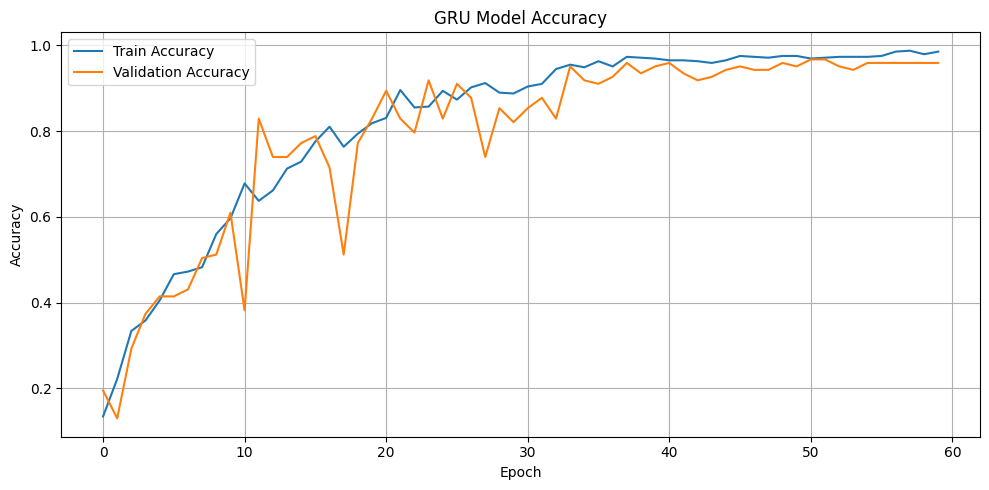

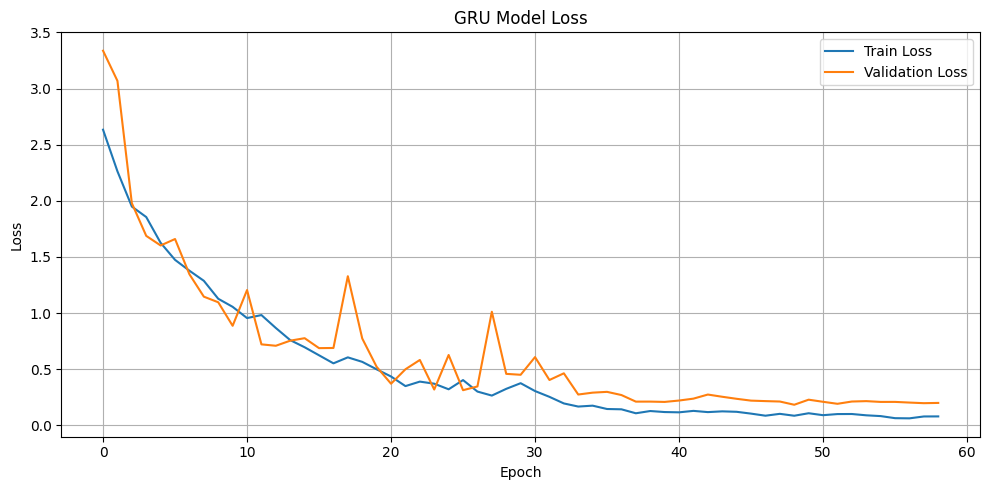

In [22]:
import matplotlib.pyplot as plt

# --- Paste your GRU training logs below ---
gru_accuracy = [
    0.1344, 0.2220, 0.3340, 0.3585, 0.4053, 0.4664, 0.4725, 0.4827, 0.5601, 0.5967,
    0.6782, 0.6375, 0.6619, 0.7128, 0.7291, 0.7760, 0.8106, 0.7637, 0.7943, 0.8187,
    0.8310, 0.8961, 0.8554, 0.8574, 0.8941, 0.8737, 0.9022, 0.9124, 0.8900, 0.8880,
    0.9043, 0.9104, 0.9450, 0.9552, 0.9491, 0.9633, 0.9511, 0.9735, 0.9715, 0.9695,
    0.9654, 0.9654, 0.9633, 0.9593, 0.9654, 0.9756, 0.9735, 0.9715, 0.9756, 0.9756,
    0.9695, 0.9715, 0.9735, 0.9735, 0.9735, 0.9756, 0.9857, 0.9878, 0.9796, 0.9857
]
gru_val_accuracy = [
    0.1951, 0.1301, 0.2927, 0.3740, 0.4146, 0.4146, 0.4309, 0.5041, 0.5122, 0.6098,
    0.3821, 0.8293, 0.7398, 0.7398, 0.7724, 0.7886, 0.7154, 0.5122, 0.7724, 0.8293,
    0.8943, 0.8293, 0.7967, 0.9187, 0.8293, 0.9106, 0.8780, 0.7398, 0.8537, 0.8211,
    0.8537, 0.8780, 0.8293, 0.9512, 0.9187, 0.9106, 0.9268, 0.9593, 0.9350, 0.9512,
    0.9593, 0.9350, 0.9187, 0.9268, 0.9431, 0.9512, 0.9431, 0.9431, 0.9593, 0.9512,
    0.9675, 0.9675, 0.9512, 0.9431, 0.9593, 0.9593, 0.9593, 0.9593, 0.9593, 0.9593
]
gru_loss = [
    2.6333, 2.2628, 1.9490, 1.8556, 1.6261, 1.4745, 1.3779, 1.2880, 1.1281, 1.0563,
    0.9563, 0.9830, 0.8679, 0.7599, 0.6964, 0.6249, 0.5532, 0.6065, 0.5665, 0.5000,
    0.4361, 0.3506, 0.3906, 0.3720, 0.3223, 0.4042, 0.3020, 0.2662, 0.3262, 0.3765,
    0.3065, 0.2550, 0.1963, 0.1685, 0.1765, 0.1467, 0.1440, 0.1087, 0.1287, 0.1196,
    0.1171, 0.1300, 0.1191, 0.1258, 0.1218, 0.1056, 0.0871, 0.1037, 0.0868, 0.1090,
    0.0917, 0.1016, 0.1022, 0.0906, 0.0836, 0.0651, 0.0636, 0.0803, 0.0808
]
gru_val_loss = [
    3.3364, 3.0679, 1.9791, 1.6880, 1.6026, 1.6600, 1.3461, 1.1469, 1.0969, 0.8875,
    1.2055, 0.7222, 0.7097, 0.7551, 0.7771, 0.6886, 0.6900, 1.3289, 0.7747, 0.5224,
    0.3719, 0.5004, 0.5833, 0.3200, 0.6276, 0.3142, 0.3475, 1.0126, 0.4596, 0.4514,
    0.6087, 0.4050, 0.4644, 0.2756, 0.2923, 0.2994, 0.2710, 0.2124, 0.2126, 0.2098,
    0.2221, 0.2390, 0.2754, 0.2557, 0.2375, 0.2213, 0.2170, 0.2133, 0.1846, 0.2297,
    0.2109, 0.1931, 0.2133, 0.2168, 0.2098, 0.2100, 0.2040, 0.1986, 0.2009
]

# --- Save Accuracy Plot ---
plt.figure(figsize=(10, 5))
plt.plot(gru_accuracy, label='Train Accuracy')
plt.plot(gru_val_accuracy, label='Validation Accuracy')
plt.title('GRU Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("gru_accuracy_plot.png", dpi=300)

# --- Save Loss Plot ---
plt.figure(figsize=(10, 5))
plt.plot(gru_loss, label='Train Loss')
plt.plot(gru_val_loss, label='Validation Loss')
plt.title('GRU Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("gru_loss_plot.png", dpi=300)

print("✅ Saved as 'gru_accuracy_plot.png' and 'gru_loss_plot.png'")


✅ Saved as 'mlp_accuracy_plot.png' and 'mlp_loss_plot.png'


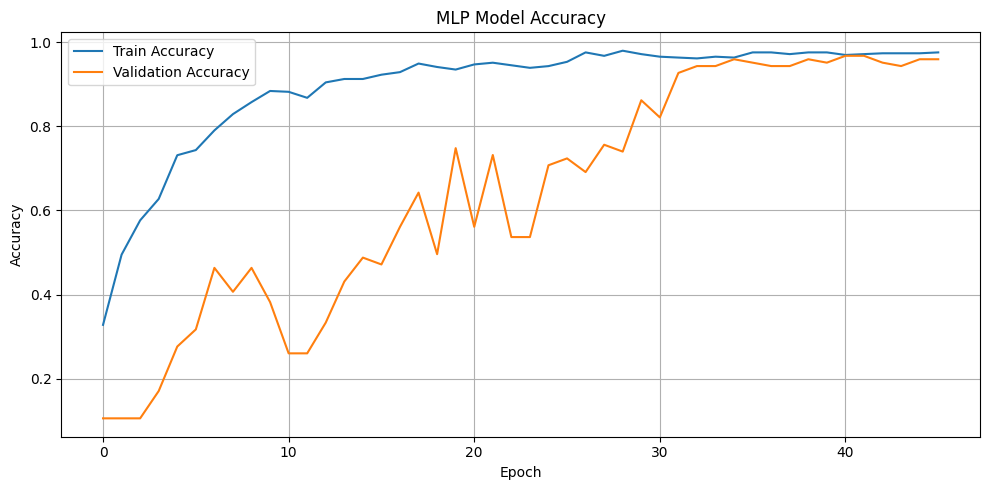

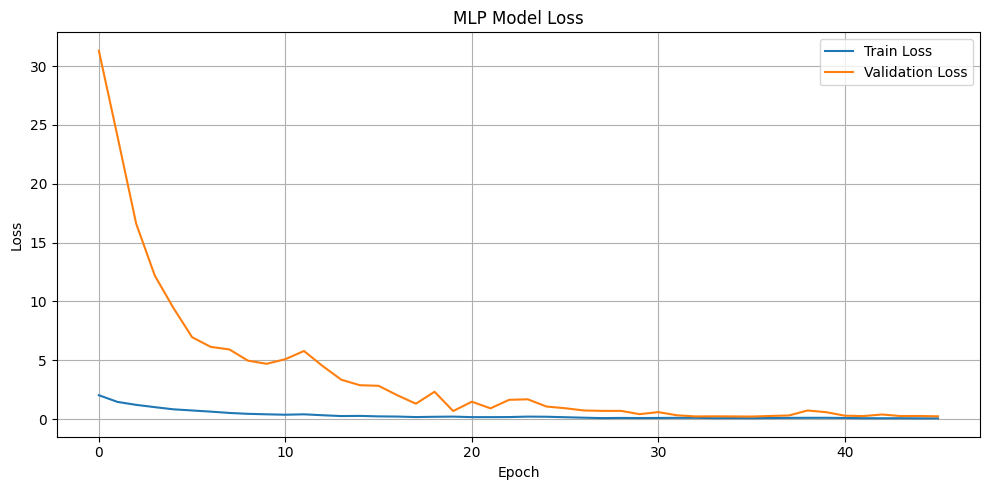

In [23]:
import matplotlib.pyplot as plt

# MLP training metrics
mlp_accuracy = [
    0.3279, 0.4949, 0.5764, 0.6273, 0.7312, 0.7434, 0.7902, 0.8289, 0.8574, 0.8839,
    0.8819, 0.8676, 0.9043, 0.9124, 0.9124, 0.9226, 0.9287, 0.9491, 0.9409, 0.9348,
    0.9470, 0.9511, 0.9450, 0.9389, 0.9430, 0.9532, 0.9756, 0.9674, 0.9796, 0.9715,
    0.9654, 0.9633, 0.9613, 0.9654, 0.9633, 0.9756, 0.9756, 0.9715, 0.9756, 0.9756,
    0.9695, 0.9715, 0.9735, 0.9735, 0.9735, 0.9756
]

mlp_val_accuracy = [
    0.1057, 0.1057, 0.1057, 0.1707, 0.2764, 0.3171, 0.4634, 0.4065, 0.4634, 0.3821,
    0.2602, 0.2602, 0.3333, 0.4309, 0.4878, 0.4715, 0.5610, 0.6423, 0.4959, 0.7480,
    0.5610, 0.7317, 0.5366, 0.5366, 0.7073, 0.7236, 0.6911, 0.7561, 0.7398, 0.8618,
    0.8211, 0.9268, 0.9431, 0.9431, 0.9593, 0.9512, 0.9431, 0.9431, 0.9593, 0.9512,
    0.9675, 0.9675, 0.9512, 0.9431, 0.9593, 0.9593
]

mlp_loss = [
    2.0361, 1.4662, 1.2160, 1.0215, 0.8365, 0.7382, 0.6412, 0.5286, 0.4538, 0.4121,
    0.3778, 0.4121, 0.3329, 0.2644, 0.2785, 0.2370, 0.2218, 0.1780, 0.2030, 0.2173,
    0.1731, 0.1722, 0.1792, 0.2171, 0.2056, 0.1653, 0.1252, 0.0907, 0.1050, 0.0968,
    0.1033, 0.1125, 0.1132, 0.0859, 0.0923, 0.0847, 0.0981, 0.1094, 0.1155, 0.1167,
    0.1014, 0.0823, 0.0771, 0.0819, 0.0702, 0.0702
]

mlp_val_loss = [
    31.3104, 24.0242, 16.6177, 12.1983, 9.4458, 6.9633, 6.1410, 5.9239, 4.9686, 4.7034,
    5.0976, 5.7934, 4.5142, 3.3528, 2.8846, 2.8346, 2.0358, 1.3140, 2.3295, 0.6911,
    1.4820, 0.9213, 1.6447, 1.6876, 1.0741, 0.9301, 0.7395, 0.7034, 0.7046, 0.4248,
    0.6012, 0.3296, 0.2329, 0.2421, 0.2346, 0.2223, 0.2723, 0.3130, 0.7377, 0.5942,
    0.2955, 0.2633, 0.3964, 0.2639, 0.2703, 0.2413
]

# --- Save Accuracy Plot ---
plt.figure(figsize=(10, 5))
plt.plot(mlp_accuracy, label='Train Accuracy')
plt.plot(mlp_val_accuracy, label='Validation Accuracy')
plt.title('MLP Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("mlp_accuracy_plot.png", dpi=300)

# --- Save Loss Plot ---
plt.figure(figsize=(10, 5))
plt.plot(mlp_loss, label='Train Loss')
plt.plot(mlp_val_loss, label='Validation Loss')
plt.title('MLP Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("mlp_loss_plot.png", dpi=300)

print("✅ Saved as 'mlp_accuracy_plot.png' and 'mlp_loss_plot.png'")
